In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Checking duplicate values
df.duplicated().sum()

0

## Spliting Dataset

In [9]:
# Seperate Features and the target variable
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

print(f'X_train shape{X_train.shape}')
print(f'X_train shape{y_train.shape}')
print(f'X_train shape{X_test.shape}')
print(f'X_train shape{y_test.shape}')

X_train shape(1168, 80)
X_train shape(292, 80)
X_train shape(1168,)
X_train shape(292,)


In [11]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
# checking duplicate
test_df.duplicated().sum()

0

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
test_df.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

## Chcking outliers

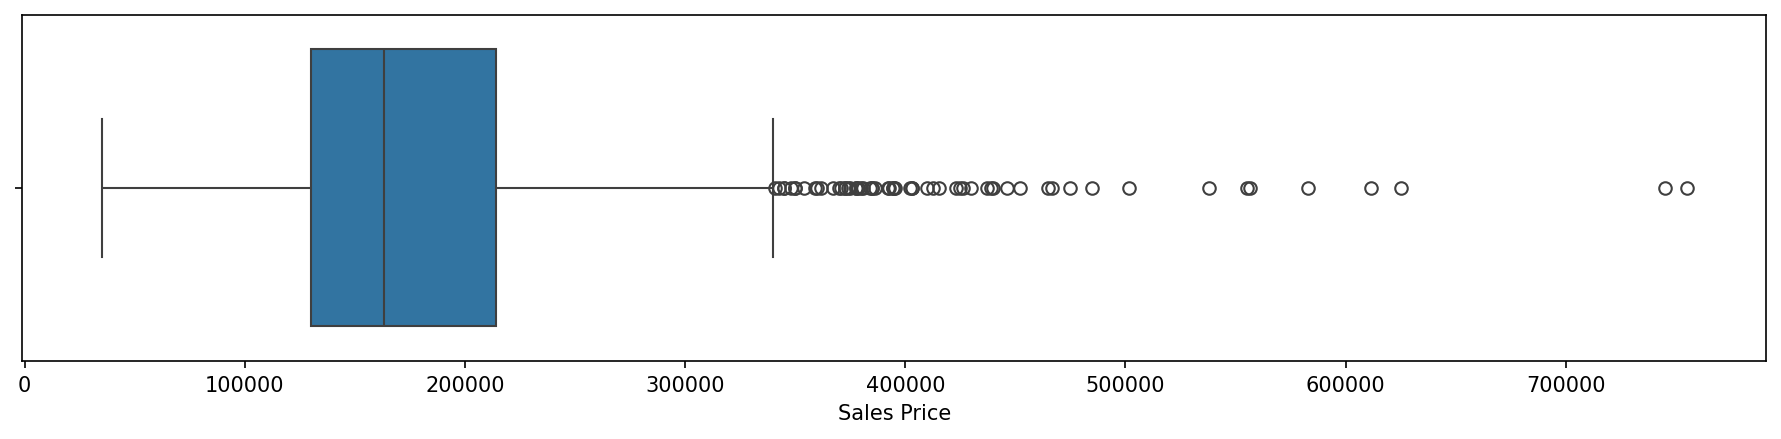

In [16]:
plt.figure(figsize=(15,3),dpi=150)
sns.boxplot(x=df['SalePrice'])
plt.xlabel('Sales Price')
plt.show()

In [20]:
# checking missing values
missing_values = X_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(X_train)) * 100
missing_percentage

LotFrontage     18.578767
Alley           93.664384
MasVnrType      58.476027
MasVnrArea       0.513699
BsmtQual         2.397260
BsmtCond         2.397260
BsmtExposure     2.397260
BsmtFinType1     2.397260
BsmtFinType2     2.397260
Electrical       0.085616
FireplaceQu     46.832192
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.486301
Fence           80.051370
MiscFeature     96.061644
dtype: float64

In [24]:
# drop those column who has missing value greter than 30%
column_to_drop = missing_percentage[missing_percentage > 30].index
X_train.drop(columns=column_to_drop,inplace=True)
X_train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      217
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 74, dtype: int64

In [25]:
column_to_fill = missing_percentage[missing_percentage < 30].index
column_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [27]:
for columns in column_to_fill:
    if X_train[columns].dtype == 'float64' or X_train[columns].dtype == 'int64':
        X_train.fillna(X_train[columns].mean(), inplace=True)
    else:
        X_train.fillna(X_train[columns].mode()[0], inplace=True)

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,40,0,0,0,0,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,164,0,0,0,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,264,0,0,0,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,242,0,0,0,0,5,2010,WD,Normal


In [28]:
X_train.isna().sum().sum()

0

In [30]:
# removing ID column
X_train.drop(columns='Id', inplace=True)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,164,0,0,0,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,264,0,0,0,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,242,0,0,0,0,5,2010,WD,Normal


## Cheking correlation of features

In [32]:
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

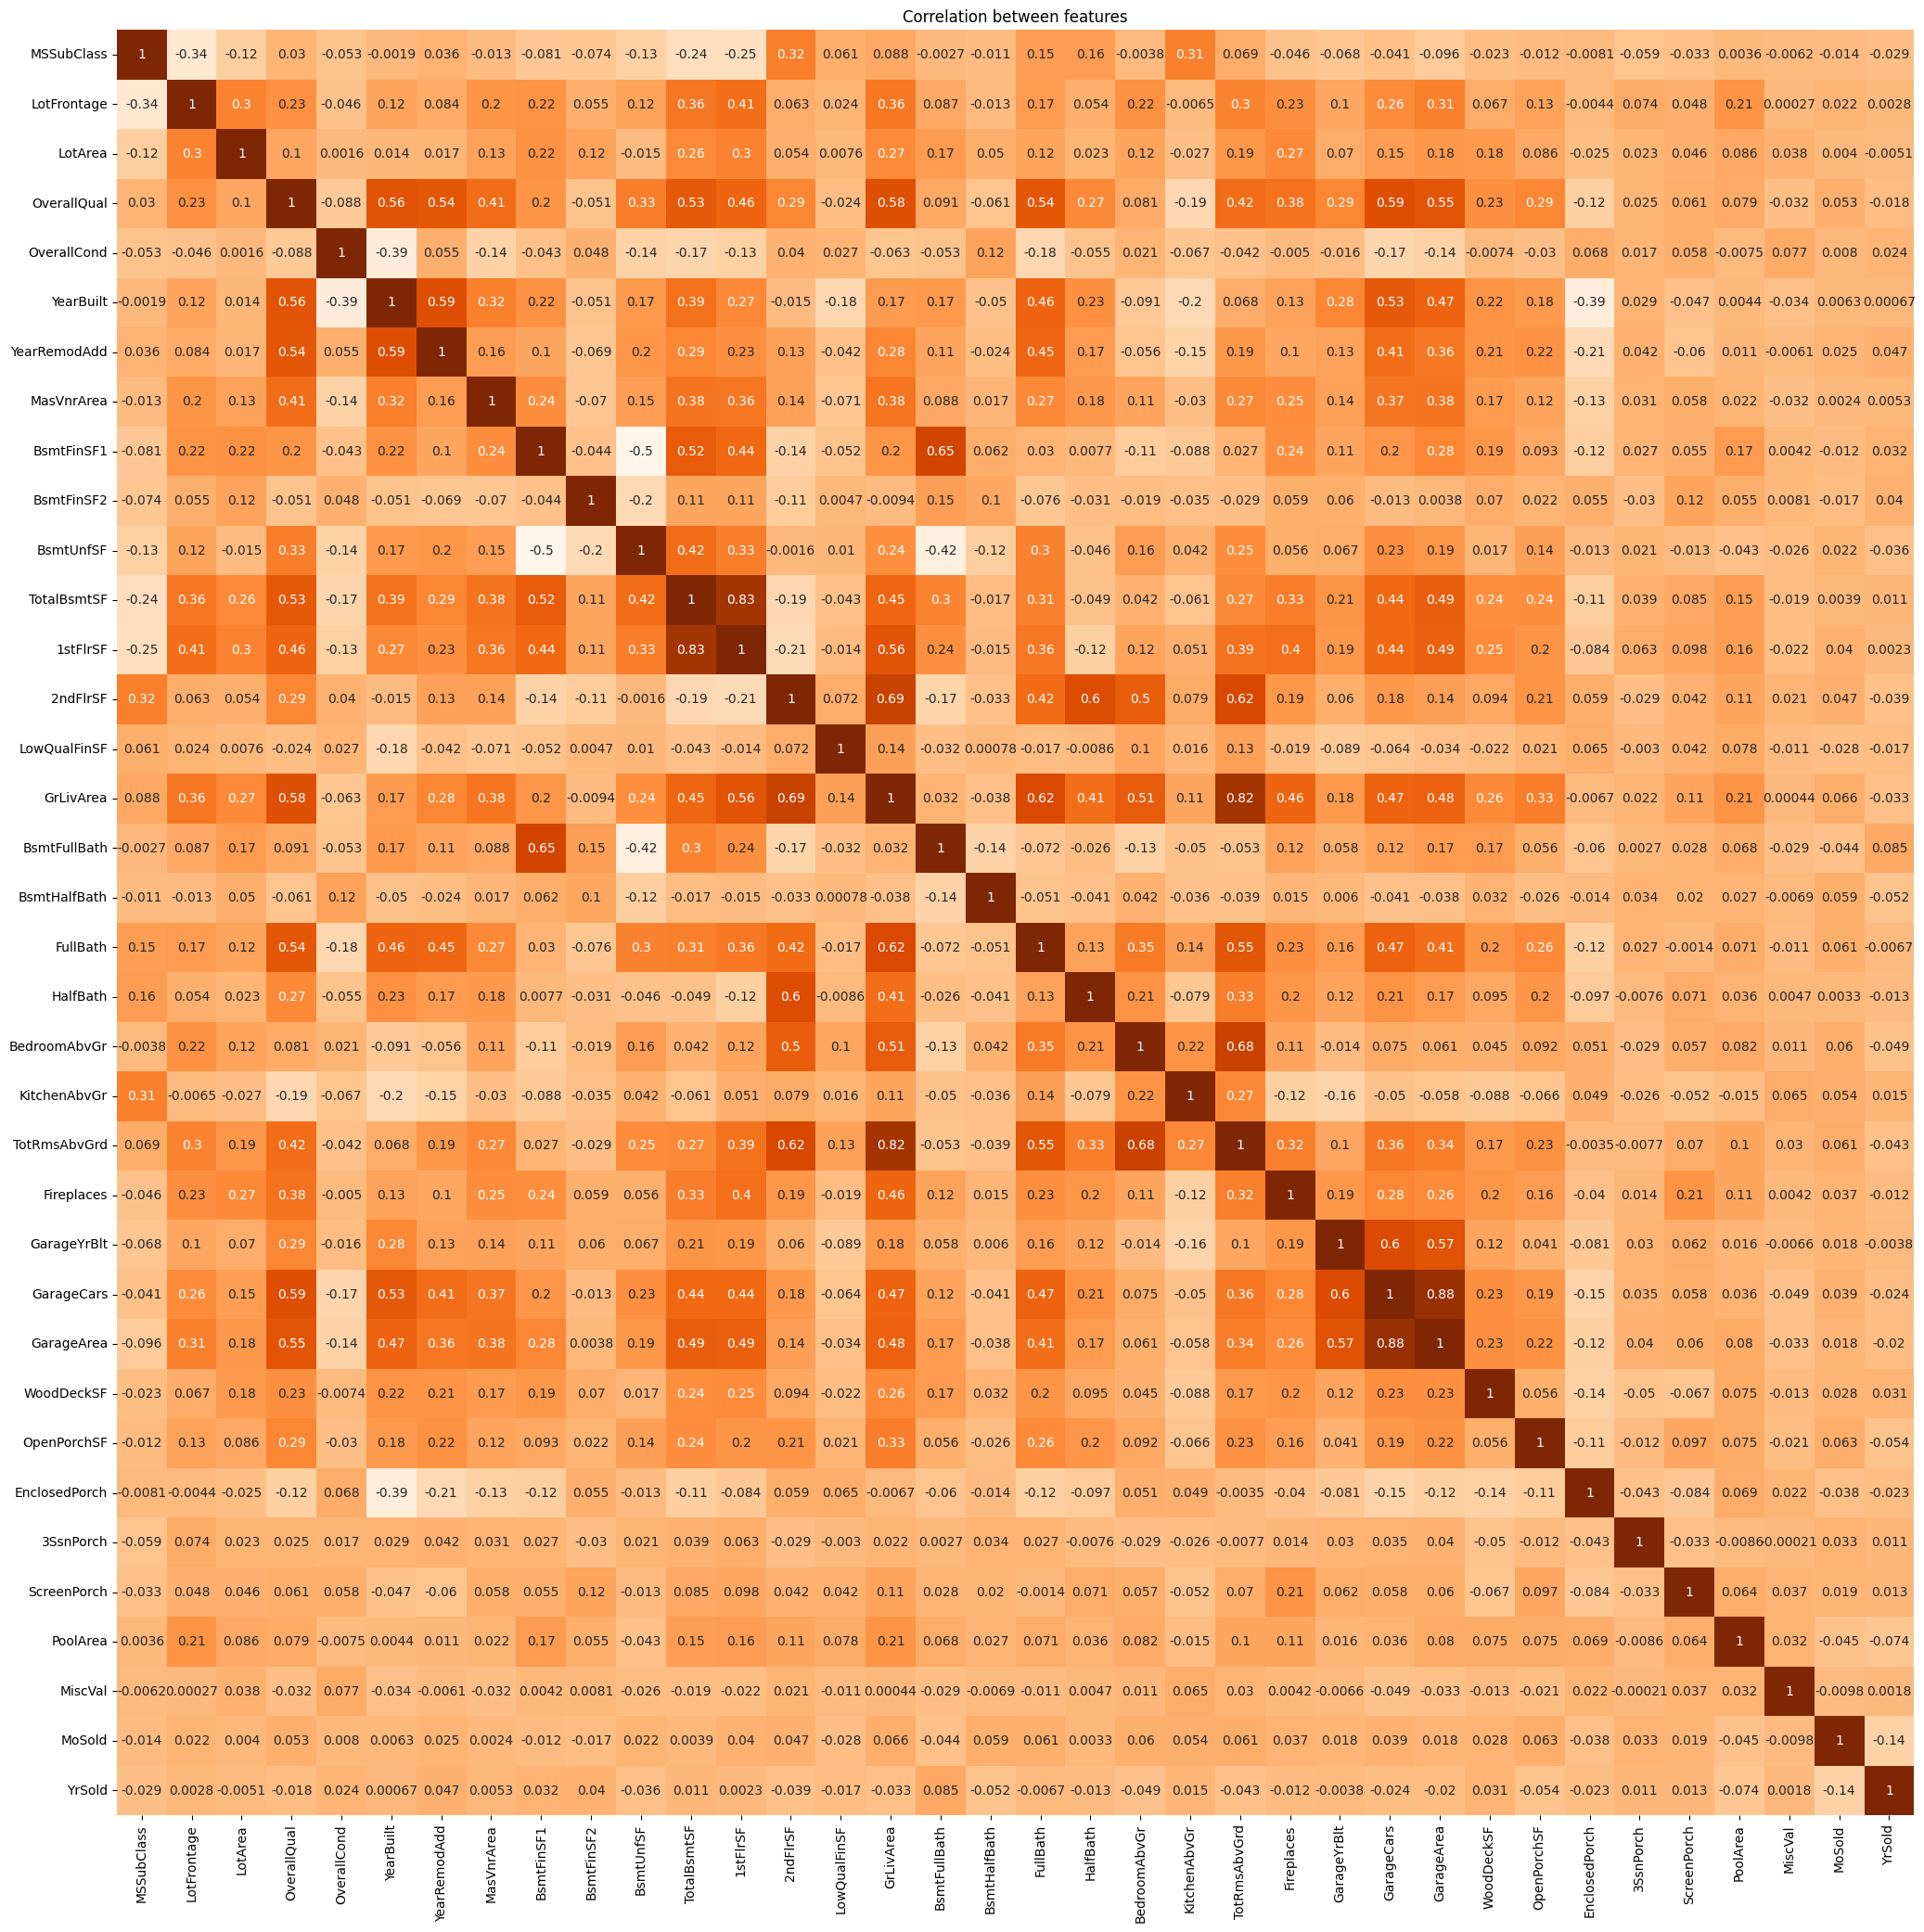

In [36]:
corr = X_train[num_data].corr()
plt.subplots(1,1,figsize=(25,25))
sns.heatmap(data=corr, cmap='Oranges', annot=corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [39]:
num_data

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [40]:
num_data.remove('GarageArea')
num_data.remove('1stFlrSF')
num_data.remove('GrLivArea')
num_data.remove('BsmtFullBath')
num_data.remove('FullBath')
num_data.remove('HalfBath')
num_data.remove('TotRmsAbvGrd')
num_data.remove('GarageYrBlt')

In [41]:
num_data

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

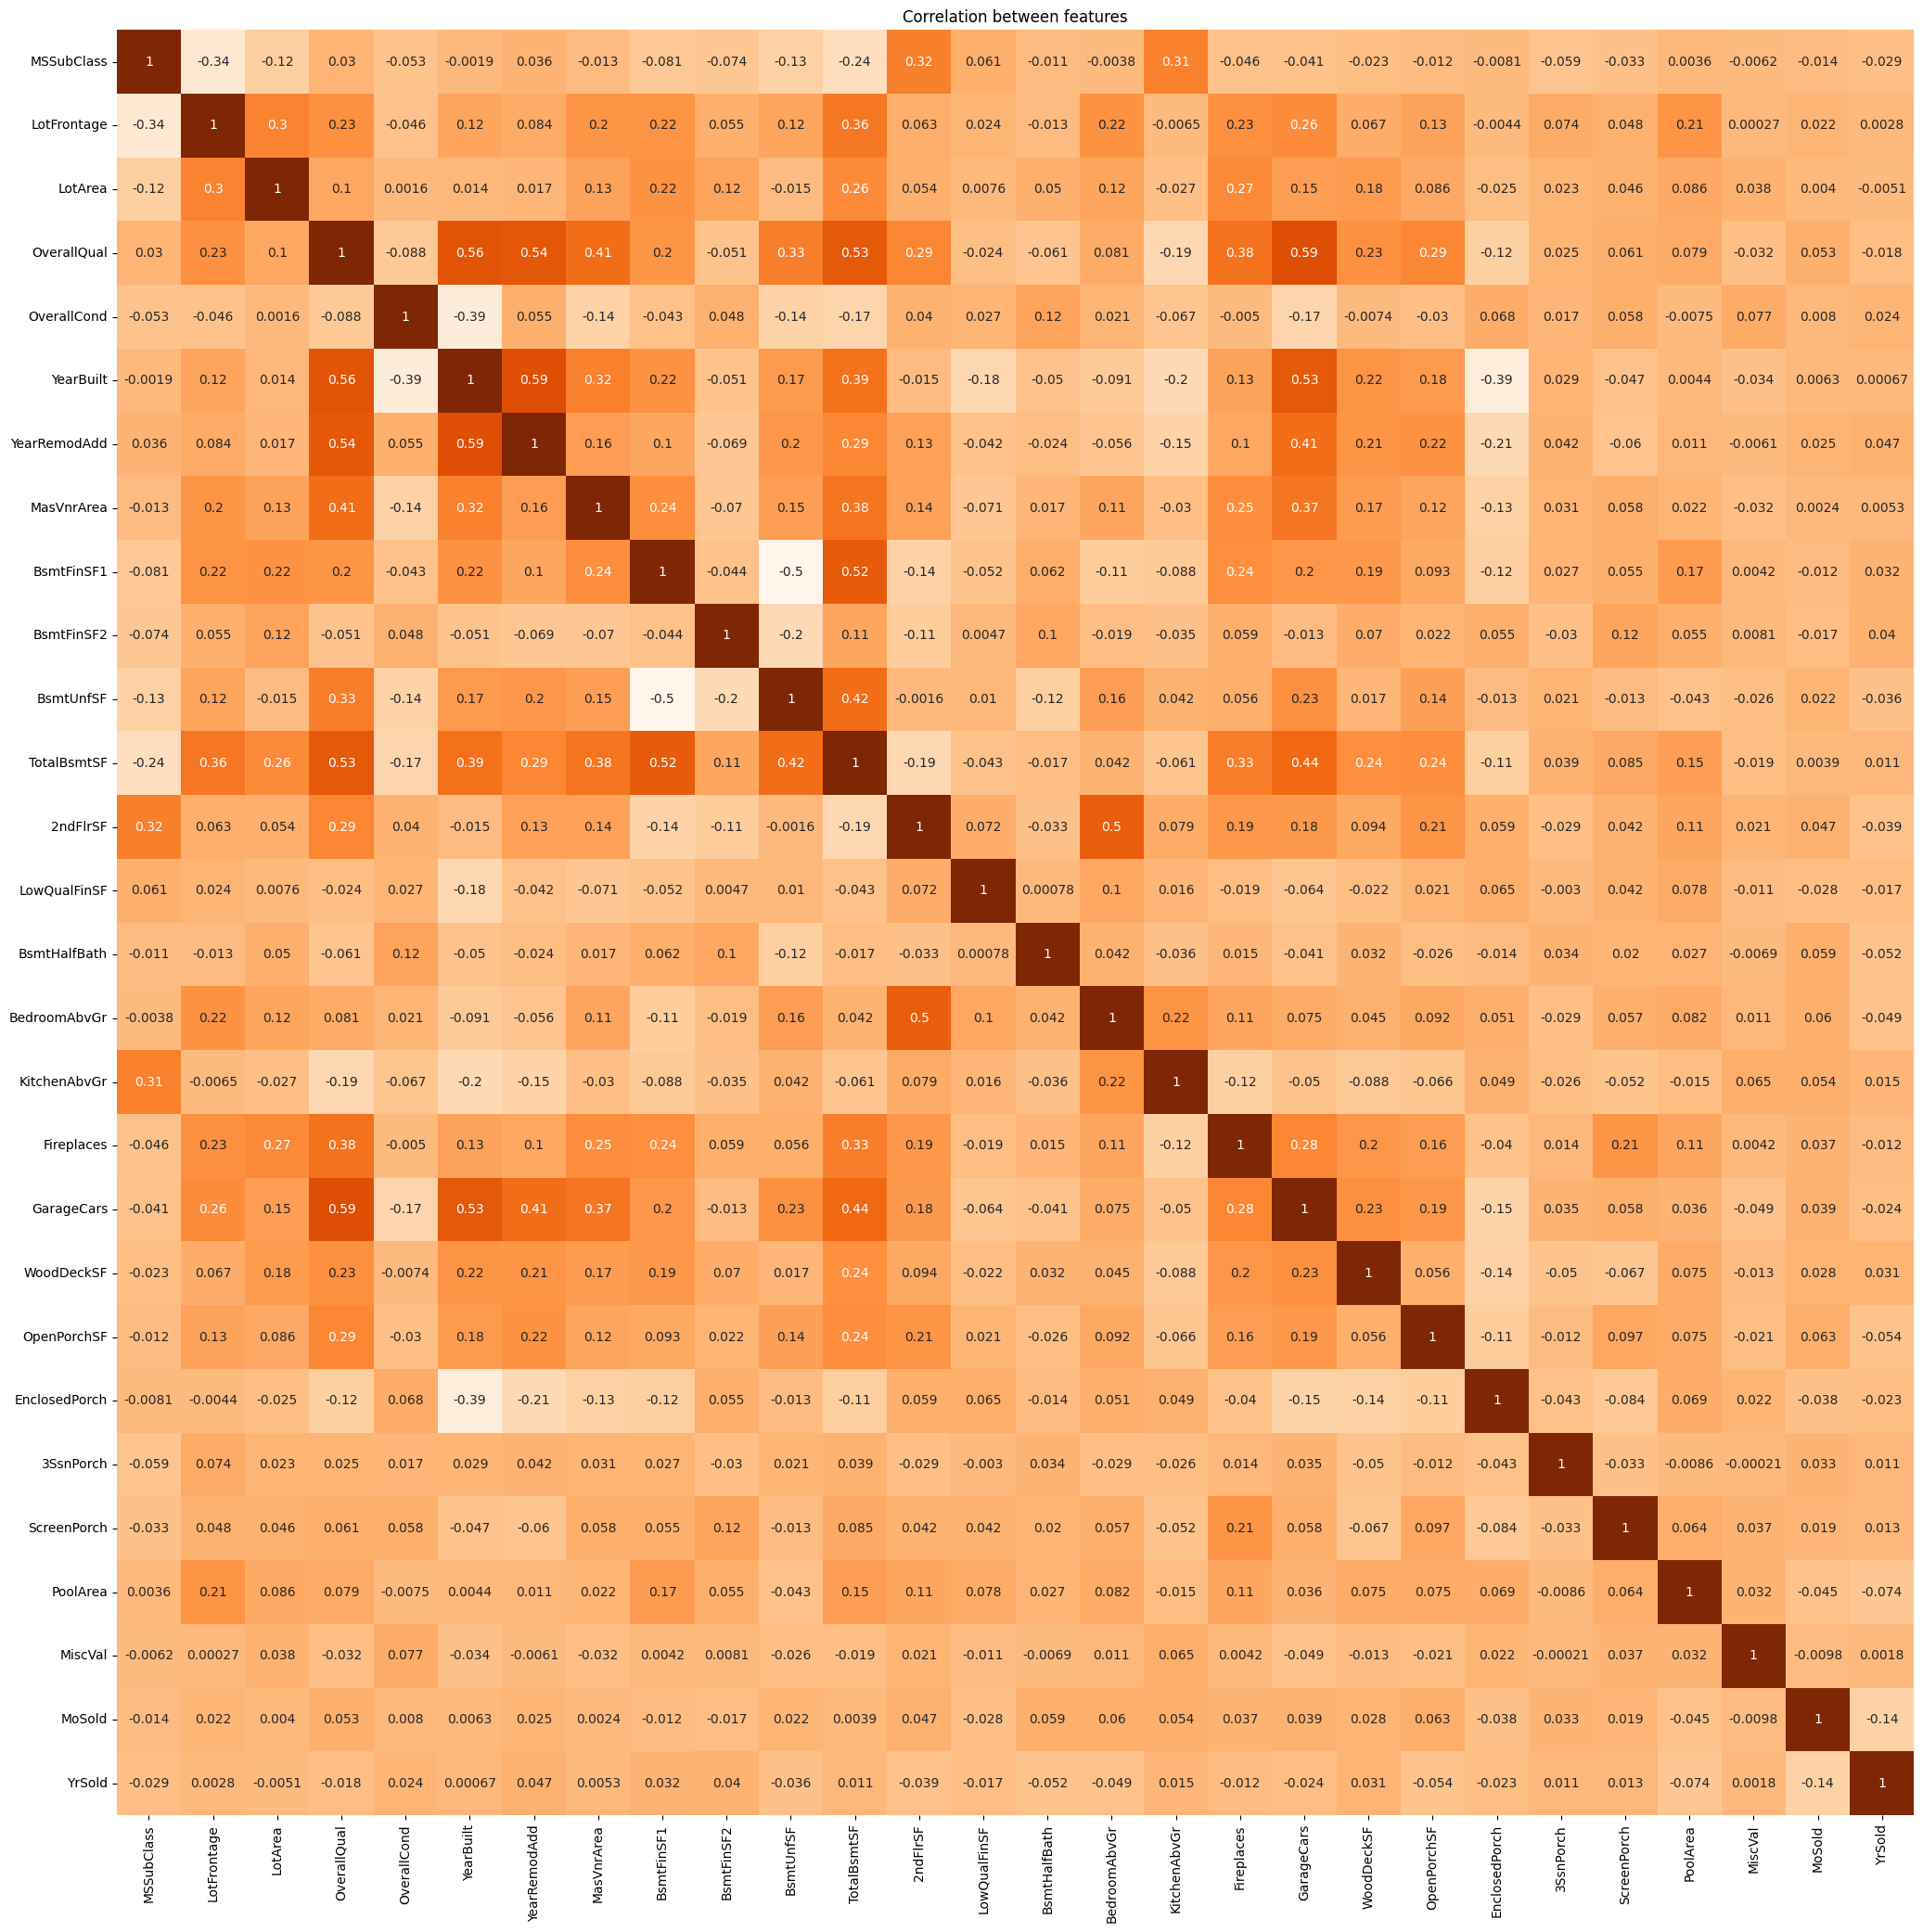

In [42]:
corr = X_train[num_data].corr()
plt.subplots(1,1,figsize=(25,25))
sns.heatmap(data=corr, cmap='Oranges', annot=corr, cbar=None)
plt.title('Correlation between features')
plt.show()

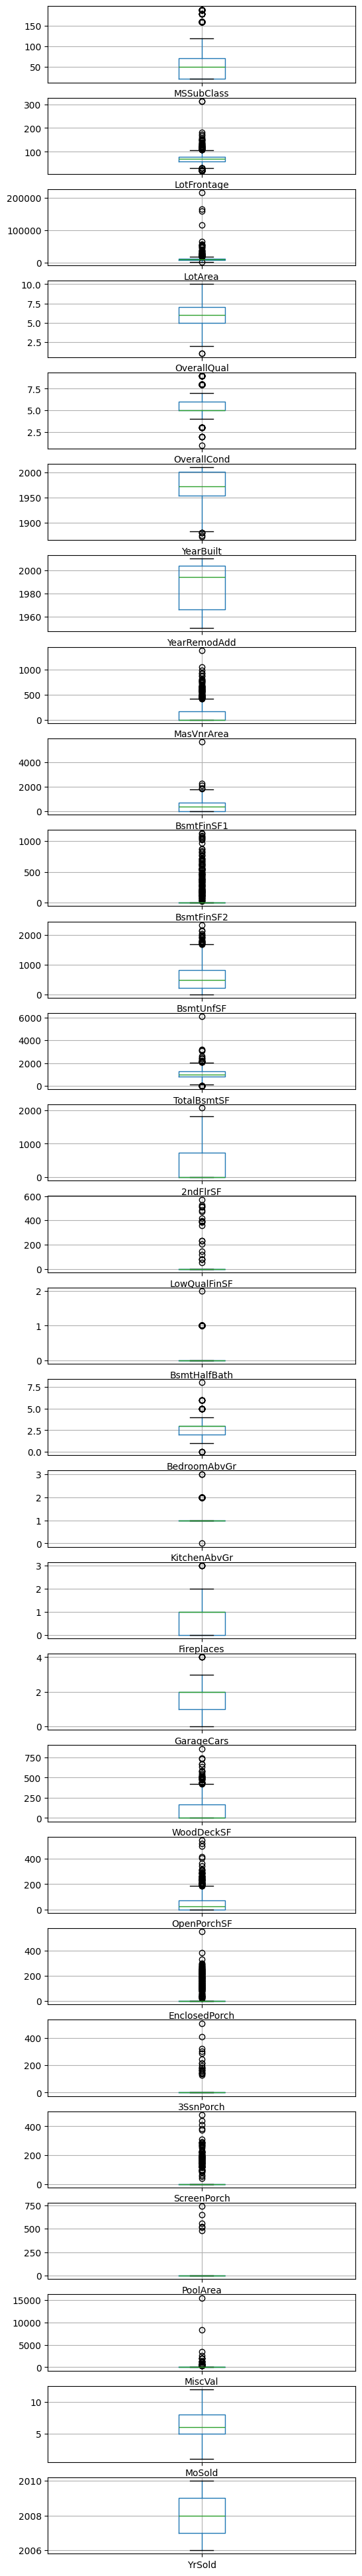

In [46]:
fig, ax = plt.subplots(len(num_data), 1, figsize=(6, 50))
for axs, feature in zip(ax, num_data):
    X_train[[feature]].boxplot(ax=axs)

In [47]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

## Create Regression Model